In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_d = pd.read_csv('subscribers.csv')

In [3]:
df_d.shape

(227628, 31)

In [4]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [5]:
# remove the 'Unnamed: 0' column
df_d.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
# 4-month contracts
df_d.months_per_bill_period.describe()
# same value： 4

count    227628.0
mean          4.0
std           0.0
min           4.0
25%           4.0
50%           4.0
75%           4.0
max           4.0
Name: months_per_bill_period, dtype: float64

In [8]:
# check unique subid
df_d.subid.unique

<bound method Series.unique of 0         21724479
1         23383224
2         26844789
3         29417030
4         26723159
            ...   
227623    21434712
227624    25843074
227625    24799085
227626    21308040
227627    20166335
Name: subid, Length: 227628, dtype: int64>

In [9]:
def convert_to_datetime(df, columns):
    for i in columns:
        df[i] = pd.to_datetime(df[i])
    return df
date_columns = ['account_creation_date', 'trial_end_date', 'cancel_date','last_payment','next_payment']

In [10]:
df_n =convert_to_datetime(df_d, date_columns)

In [11]:
df_n['num_end_create'] = df_n['trial_end_date'].subtract(df_n['account_creation_date'])

In [12]:
# confirm num_trial_days = difference of trial_end_date-account_creation_date
sum(df_n['num_end_create'].dt.days != df_n['num_trial_days'])

0

In [13]:
df_n.fillna('NA')

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,num_end_create
0,21724479,economy,NA,comedy,access to exclusive content,NA,NA,NA,False,UAE,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NA,True,14 days
1,23383224,base,NA,comedy,access to exclusive content,22.9516,NA,70,False,UAE,...,ar,NA,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NA,True,14 days
2,26844789,enhanced,3,regional,replace OTT,36.0012,2,25,True,UAE,...,ar,NA,14,False,0,NA,NA,NA,True,14 days
3,29417030,base,NA,drama,replace OTT,20.0517,NA,30,False,UAE,...,ar,NA,14,False,0,NA,NA,NA,True,14 days
4,26723159,base,4,comedy,replace OTT,22.9516,3,28,False,UAE,...,ar,NA,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NA,True,14 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3,comedy,supplement OTT,28.7514,2,38,False,UAE,...,ar,NA,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NA,True,14 days
227624,25843074,enhanced,2,comedy,replace OTT,27.3014,2,49,False,UAE,...,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NA,True,14 days
227625,24799085,base,NA,comedy,access to exclusive content,31.6513,NA,45,False,UAE,...,ar,NA,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NA,True,14 days
227626,21308040,base,NA,comedy,access to exclusive content,NA,NA,NA,False,UAE,...,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NA,True,14 days


In [18]:
df1 = df_n.pivot_table(index = 'plan_type',values = ['num_trial_days', 'monthly_price', 'discount_rate'])
df1

,discount_price,discount_rate,monthly_price,num_trial_days
plan_type,,,,
base_eur_14_day_trial,4.2205,0.049587,4.4407,14
base_uae_14_day_trial,4.5141,0.046512,4.7343,14
base_uae_no_trial_7_day_guarantee,4.4407,0.062016,4.7343,0
high_aud_14_day_trial,3.7801,0.055046,4.0003,14
high_jpy_14_day_trial,4.4407,0.054688,4.6976,14
high_sar_14_day_trial,4.0737,0.067227,4.3673,14
high_uae_14_day_trial,5.0279,0.014388,5.1013,14
low_eur_no_trial,1.1744,0.000000,1.1744,0
low_gbp_14_day_trial,4.3673,0.077519,4.7343,14


2 types of num_trial_days: 0, 14

In [19]:
df_n.groupby('plan_type')['payment_period'].agg(['count','min', 'max', 'sum', 'mean',])

,count,min,max,sum,mean
plan_type,,,,,
base_eur_14_day_trial,18,0,2,12,0.666667
base_uae_14_day_trial,227096,0,3,179264,0.789375
base_uae_no_trial_7_day_guarantee,1,1,1,1,1.000000
high_aud_14_day_trial,2,0,3,3,1.500000
high_jpy_14_day_trial,1,1,1,1,1.000000
high_sar_14_day_trial,12,0,2,5,0.416667
high_uae_14_day_trial,325,0,2,393,1.209231
low_eur_no_trial,1,0,0,0,0.000000
low_gbp_14_day_trial,4,0,2,3,0.750000


# Question?
why did this happend? when the trial_completed == True & current_sub_TF == True but the payment_period == 0?

In [20]:
pd.crosstab(index=df_n['plan_type'], columns = df_n['num_trial_days'])

num_trial_days,0,14
plan_type,,
base_eur_14_day_trial,0,18
base_uae_14_day_trial,0,227096
base_uae_no_trial_7_day_guarantee,1,0
high_aud_14_day_trial,0,2
high_jpy_14_day_trial,0,1
high_sar_14_day_trial,0,12
high_uae_14_day_trial,0,325
low_eur_no_trial,1,0
low_gbp_14_day_trial,0,4


In [355]:
df_n.groupby(['current_sub_TF', 'trial_completed', 'payment_period']).size()

current_sub_TF  trial_completed  payment_period
False           False            0                 26227
                                 1                   269
                True             0                 60314
                                 1                  9914
                                 2                   654
True            False            0                   896
                True             0                  7954
                                 1                 76785
                                 2                 42267
                                 3                  2348
dtype: int64

# Conclusion of user_type
- total users 227628
- 86541 never subscribe the OTT services
- 896 people are still in trails
- 121400 people are currently paying users
- 10837 people churned

However, we have 7954 users who completed trails and can access current contents but their payment period are all 0 (That is a contradiction.)

- ab testing, what factor influent people leave us?
join_fee, language(all users choose 'ar')
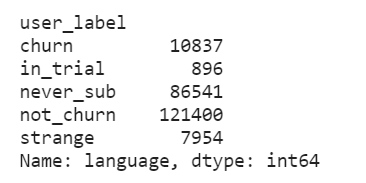

In [30]:
df_n.language.describe()

count     227628
unique         1
top           ar
freq      227628
Name: language, dtype: object

In [31]:
df_n.join_fee.describe()

count    192724.000000
mean          0.115145
std           0.176971
min          -0.660600
25%           0.036700
50%           0.036700
75%           0.110100
max           0.734000
Name: join_fee, dtype: float64

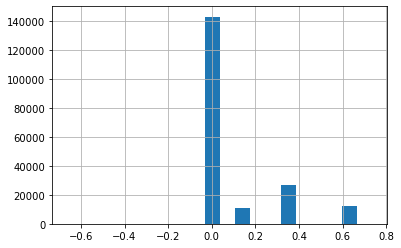

In [32]:
df_n.join_fee.hist(bins = 20)

In [33]:
# label users
conditions = [(df_n['payment_period'] != 0) & (df_n['current_sub_TF'] == True), (df_n['payment_period']!= 0) & (df_n['current_sub_TF'] == False), (df_n['payment_period'] == 0) & (df_n['current_sub_TF'] == False), (df_n['payment_period'] == 0) & (df_n['current_sub_TF'] == True) & (df_n['trial_completed'] == False), (df_n['payment_period'] == 0) & (df_n['current_sub_TF'] == True) & (df_n['trial_completed'] == True)]
choices  = ['not_churn','churn','never_sub','in_trial','strange']
df_n['user_label'] = np.select(conditions, choices, default = np.nan)
df_n['user_label'].describe()

count        227628
unique            5
top       not_churn
freq         121400
Name: user_label, dtype: object

In [34]:
df_n.groupby('user_label')['language'].agg('count')

user_label
churn         10837
in_trial        896
never_sub     86541
not_churn    121400
strange        7954
Name: language, dtype: int64

# Get the churn model dataset

In [35]:
# create a column of churn
conditions = [df_n['user_label'] == 'churn', df_n['user_label'] == 'not_churn']
choices = [1, 0]
df_n['churn_TF'] = np.select(conditions, choices, default = np.nan)
df_n.groupby('churn_TF').size()

churn_TF
0.0    121400
1.0     10837
Name: language, dtype: int64

In [36]:
# get the dataset for churn model
churn = df_n[df_n['churn_TF'].isin([1,0])]
churn.shape

(132237, 34)

In [37]:
churn.to_csv('sub_churn_data.csv')

In [356]:
# get the dataset which removes users in trial and problematic records
not_in_trial = df_n[df_n['user_label'].isin(['never_sub', 'churn', 'not_churn'])]
not_in_trial.shape

(218778, 34)

In [357]:
not_in_trial.to_csv('not_in_trial.csv')

In [358]:
# compute the total conversion rate
not_in_trial.groupby('user_label').size()

user_label
churn         10837
never_sub     86541
not_churn    121400
dtype: int64

In [360]:
conversion_rate = (10837+121400)/not_in_trial.shape[0]
conversion_rate 

0.604434632367057

# Attribution & Allocation


In [42]:
# read the channel spend dataset
c_spend = pd.read_csv('channel_spend_graduate.csv')

In [43]:
c_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   channel    40 non-null     object
 1   date       40 non-null     int64 
 2   spend_AED  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [44]:
c_spend['date'] = c_spend.date.map(str)
c_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   channel    40 non-null     object
 1   date       40 non-null     object
 2   spend_AED  40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [45]:
# rewrite the format of datatime values
for i in range(c_spend.shape[0]):
    c_spend.iloc[i, 1] = '-'.join([c_spend.iloc[i, 1][:4],c_spend.iloc[i, 1][4:6]])

In [46]:
c_spend.head()

,channel,date,spend_AED
0,bing,2019-07,400
1,display,2019-07,12
2,facebook,2019-07,9000
3,search,2019-07,13000
4,youtube,2019-07,90


In [47]:
c_spend['date'] = pd.to_datetime(c_spend['date'])

In [48]:
c_spend.info()
c_spend.to_csv('channel_spend.csv')   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   channel    40 non-null     object        
 1   date       40 non-null     datetime64[ns]
 2   spend_AED  40 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ KB


# Calculate revenues

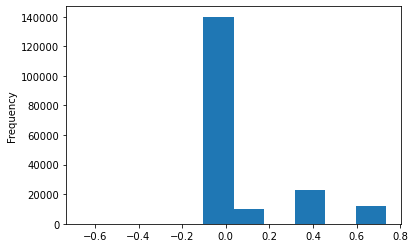

In [366]:
not_in_trial.join_fee.plot(kind = 'hist') # find some records's join fees are < 0

In [369]:
not_in_trial[not_in_trial.join_fee < 0].shape
# 13 records with join fees < 0
# decide to ignore them when sum join fees

(13, 34)

In [372]:
not_in_trial.join_fee.describe() 
# total case 185083

count    185083.000000
mean          0.111453
std           0.175980
min          -0.660600
25%           0.036700
50%           0.036700
75%           0.036700
max           0.734000
Name: join_fee, dtype: float64

In [396]:
# compute the total join fees
31954+153116

185070

In [373]:
take_join_fee = not_in_trial[not_in_trial.join_fee>0].shape[0]# 153116 took join fee
not_take_join_fee = not_in_trial[not_in_trial.join_fee == 0].shape[0] # 31954 not taken join fee
print(not_take_join_fee) 
print(take_join_fee) 

31954
153116


In [1]:
# drop records with negative join fees (13 records)
31954 + 153116 

185070

In [391]:
not_in_trial[(not_in_trial.join_fee>0) & (not_in_trial.user_label != 'never_sub')].user_label.unique()

array(['not_churn', 'churn'], dtype=object)

In [377]:
# compute the conversion rate of people who are charged join fees
take_fee_con_r = not_in_trial[(not_in_trial.join_fee>0) & (not_in_trial.user_label != 'never_sub')].shape[0]/take_join_fee
take_fee_con_r

0.587841897646229

In [390]:
not_in_trial[(not_in_trial.join_fee==0) & (not_in_trial.user_label != 'never_sub')].user_label.unique()

array(['not_churn', 'churn'], dtype=object)

In [392]:
# compute the conversion rate of people who are not charged join fees
not_take_fee_con_r = not_in_trial[(not_in_trial.join_fee ==0) & (not_in_trial.user_label != 'never_sub')].shape[0]/not_take_join_fee
not_take_fee_con_r

0.5605870939475496

In [382]:
# revenue from paying users, payment * payment_period * months_per_bill_period
discount_revenue = churn['discount_price']*churn['payment_period']*churn['months_per_bill_period']
discount_revenue.sum()

3245889.661999999

In [62]:
# revenue from paying users, payment * payment_period * months_per_bill_period
n_discount_revenue = churn['monthly_price']*churn['payment_period']*churn['months_per_bill_period']
n_discount_revenue.sum()

3403951.7176000006

In [393]:
# join fee for total users
j1 = df_n[df_n.join_fee >= 0].join_fee.sum()
j2 = df_n.join_fee.sum() 
print(j1)
print(j2)

22193.3708
22191.278899999998


In [395]:
total_revenue = j1 + discount_revenue.sum()
total_revenue

3268083.032799999

# Attribution and allocation

In [399]:
total_c_s = c_spend.spend_AED.sum()
total_c_s

355896

In [398]:
total_c_s/total_revenue


0.1089005378468241

In [408]:
c_spend.groupby('channel')['spend_AED'].agg('sum')

channel
bing         10800
display        366
facebook    113500
search      222500
youtube       8730
Name: spend_AED, dtype: int64

# Compute channel spend

In [400]:
# filter channel spend months
channel_month = [1,2,7,8,9,10,11,12]
channel = not_in_trial[not_in_trial['account_creation_date'].dt.month.isin(channel_month)]

In [401]:
channel.account_creation_date.describe()

count                  198843
unique                 197494
top       2019-12-28 16:35:34
freq                        3
first     2019-07-01 00:00:19
last      2020-02-29 23:59:47
Name: account_creation_date, dtype: object

In [406]:
channel_type = ['bing', 'search','youtube','display','facebook']
channel_s = channel[channel['attribution_technical'].isin(channel_type)]
channel_s.groupby('attribution_technical').size()

attribution_technical
bing          967
display      1259
facebook    72044
search      22105
youtube       734
dtype: int64

In [403]:
channel_s.user_label.unique()

array(['not_churn', 'never_sub', 'churn'], dtype=object)

In [404]:
cac_channel = channel_s[channel_s['user_label'] != 'never_sub']

In [405]:
cac_channel.groupby('attribution_technical').size()

attribution_technical
bing          506
display       721
facebook    40517
search      15017
youtube       583
dtype: int64

In [414]:
cac_channel.to_csv('cac_channel.csv')

# label users: find conversion rate

In [77]:
# based on 3 conditions: current_sub_TF, payment_period, trial_completed
df_n.groupby(['current_sub_TF','payment_period','trial_completed',])['language'].count()

current_sub_TF  payment_period  trial_completed
False           0               False              26227
                                True               60314
                1               False                269
                                True                9914
                2               True                 654
True            0               False                896
                                True                7954
                1               True               76785
                2               True               42267
                3               True                2348
Name: language, dtype: int64

In [86]:
# based on 3 conditions: current_sub_TF, payment_period, trial_completed
df_n.groupby(['current_sub_TF','trial_completed','initial_credit_card_declined','payment_period'])['language'].count()

current_sub_TF  trial_completed  initial_credit_card_declined  payment_period
False           False            False                         0                 24977
                                                               1                   262
                                 True                          0                  1250
                                                               1                     7
                True             False                         0                 57650
                                                               1                  9330
                                                               2                   613
                                 True                          0                  2664
                                                               1                   584
                                                               2                    41
True            False            False              

In [89]:
# check if their last_payment is before the next_payment: yes, no problem
len(df_n[df_n['next_payment']<df_n['last_payment']])

0

In [87]:
# subset the dataset to understand type of users
df_date = df_n.loc[:,['trial_end_date','last_payment','next_payment','cancel_date','current_sub_TF','trial_completed','payment_period','initial_credit_card_declined']]

In [88]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trial_end_date                227628 non-null  datetime64[ns]
 1   last_payment                  132237 non-null  datetime64[ns]
 2   next_payment                  130250 non-null  datetime64[ns]
 3   cancel_date                   36831 non-null   datetime64[ns]
 4   current_sub_TF                227628 non-null  bool          
 5   trial_completed               227628 non-null  bool          
 6   payment_period                227628 non-null  int64         
 7   initial_credit_card_declined  227628 non-null  bool          
dtypes: bool(3), datetime64[ns](4), int64(1)
memory usage: 9.3 MB


1. make sure last_payment < next_payment, checked last_payment < cancel_date
- cancel_date (date user request to cancel service) < trial_end_date, (they want to leave anyway)
cancel_date> trial_end_date, current_TF: True, (they are planning to churn), current_TF : FALSE: 
- last_payment(succssfully made payment) > trial_end_date(check payment_period, p = 0:shit, p=1,p=2,p=3(mius-1, get the previous renewal period) ), last_payment(succssfully made payment) < trial_end_date(convert to customer in trials )
-cancel_date < trial_end_date: 


In [ ]:
# based on 3 conditions: current_sub_TF, payment_period, trial_completed
df_date.groupby(['current_sub_TF','payment_period','trial_completed'])['cancel_date'].count()

In [106]:
len(df_date[df_date['last_payment']>df_date['next_payment']]) # 

0

In [148]:
# ! problem:
# last payment  should be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[df_date['last_payment']>df_date['cancel_date']]) # 

296

In [92]:
# ! problem:
# last payment  should be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[(df_date['last_payment']<df_date['trial_end_date']) & (df_date['current_sub_TF']== False)]) # 

0

In [93]:
# ! problem:
# last payment  should be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[df_date['next_payment']>df_date['cancel_date']]) # 

896

In [94]:
# ! problem:
# last payment  should be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[df_date['next_payment']<df_date['cancel_date']]) # 

0

In [95]:
# ! problem:
# last payment shbould be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[df_date['next_payment']<df_date['trial_end_date']]) # 

0

In [96]:
# ! problem:
# last payment shbould be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[df_date['cancel_date']>df_date['trial_end_date']]) # 

9439

In [97]:
# ! problem:
# last payment shbould be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[(df_date['cancel_date']>df_date['trial_end_date']) & (df_d['payment_period']==0)]) # 

18

In [99]:
# ! problem:
# last payment shbould be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[(df_date['cancel_date']<df_date['trial_end_date']) & (df_d['payment_period']!=0)]) # 

269

In [98]:
# ! problem:
# last payment shbould be < cancel_date, **problem: 296 大于cancel date: system problem?**
len(df_date[(df_date['cancel_date']>df_date['trial_end_date']) & (df_d['current_sub_TF']== True) & (df_d['payment_period']==0)])

0

In [108]:
df_date['last_payment_after_next_payment'] = False

In [110]:
df_date['last_payment_after_next_payment'].describe()

count     227628
unique         1
top        False
freq      227628
Name: last_payment_after_next_payment, dtype: object

In [130]:
len(df_date[df_date['cancel_date'] == y])

0

In [132]:
y =  numpy.datetime64('NaT')
y == y

False

In [135]:
df_date.head()

,trial_end_date,last_payment,next_payment,cancel_date,current_sub_TF,trial_completed,payment_period,initial_credit_card_declined,last_payment_before_next_payment,last_payment_after_next_payment
0,2020-02-07 21:44:16,2020-02-07 21:44:16,2020-06-07 21:44:16,NaT,True,True,1,False,True,False
1,2020-03-15 15:44:35,2020-03-15 15:44:35,2020-07-15 15:44:35,NaT,True,True,1,False,True,False
2,2019-12-21 16:37:06,NaT,NaT,NaT,False,True,0,False,False,False
3,2020-02-10 16:09:32,NaT,NaT,NaT,False,True,0,False,False,False
4,2019-10-19 12:57:07,2020-02-19 12:57:07,2020-06-19 12:57:07,NaT,True,True,2,False,True,False


In [134]:
x = pd.NaT
x is x

True

In [139]:
df_date.iloc[0,3]is not x

False

In [150]:
bill_per = 4
df_date['check_np'] = df_date['last_payment']+pd.DateOffset(months=bill_per)
sum(df_date['check_np'] == df_date['next_payment']) # true

121400

In [ ]:
# period =0 

In [219]:
p0 = df_date[df_date['payment_period'] == 0]
p0['last_payment'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: last_payment, dtype: object

In [ ]:
# payment period = 1

In [217]:
p1 = df_date[df_date['payment_period'] == 1]
p1['last_payment'].describe()

count                   86968
unique                  86607
top       2020-03-14 19:26:26
freq                        3
first     2019-07-14 00:01:45
last      2020-03-27 23:54:56
Name: last_payment, dtype: object

In [218]:
sum(p1['last_payment'] == p1['trial_end_date'])

86968

In [ ]:
# period  = 2

In [209]:
p2 = df_date[df_date['payment_period'] == 2]
p2['last_payment'].describe()

count                   42921
unique                  42773
top       2020-02-29 12:16:18
freq                        3
first     2019-11-14 00:17:23
last      2020-03-27 23:47:37
Name: last_payment, dtype: object

In [210]:
sum(p2['last_payment'] == p2['trial_end_date']+pd.DateOffset(months= 4))

42921

In [213]:
# period = 3
p3 = df_date[df_date['payment_period'] == 3]
p3['last_payment'].describe()

count                    2348
unique                   2341
top       2020-03-17 17:22:41
freq                        2
first     2020-03-14 00:01:31
last      2020-03-27 23:19:39
Name: last_payment, dtype: object

In [214]:
sum(p3['last_payment'] == p3['trial_end_date']+pd.DateOffset(months= 8))

2348

In [247]:
# cacel_date == trial_end_date, no cases
c_e_t = df_date[df_date['cancel_date'] == df_date['trial_end_date']]
c_e_t.shape[0]

0

In [224]:
# cacel_date < trial_end_date, period == 0
# want cancel after trial, and they success
c_s_t = df_date[df_date['cancel_date'] < df_date['trial_end_date']]
sum(c_s_t['payment_period'] == 0)

27123

In [253]:
c_s_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27392 entries, 9 to 227627
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   trial_end_date                    27392 non-null  datetime64[ns]
 1   last_payment                      269 non-null    datetime64[ns]
 2   next_payment                      896 non-null    datetime64[ns]
 3   cancel_date                       27392 non-null  datetime64[ns]
 4   current_sub_TF                    27392 non-null  bool          
 5   trial_completed                   27392 non-null  bool          
 6   payment_period                    27392 non-null  int64         
 7   initial_credit_card_declined      27392 non-null  bool          
 8   last_payment_before_next_payment  27392 non-null  bool          
 9   last_payment_after_next_payment   27392 non-null  bool          
 10  check_np                          269 non-nul

In [242]:
# want cancel after trial, and they failed
sum(c_s_t['payment_period'] != 0)

269

In [243]:
# want cancel after trial, and they failed, and they all churn after period =1
sum(c_s_t['payment_period'] == 1)

269

In [254]:
27123+269

27392

In [256]:
27392+9439

36831

In [323]:
# cancel_date > trial_end_date: last_payment+4 months > cancel_date > last_payment
c_l_t = df_date[df_date['cancel_date'] > df_date['trial_end_date']]
sum((c_l_t['cancel_date'] > c_l_t['last_payment']) & (c_l_t['cancel_date'] < (c_l_t['last_payment']+ pd.DateOffset(months= 4))))

9394

In [293]:
c_l_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9439 entries, 10 to 227579
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   trial_end_date                    9439 non-null   datetime64[ns]
 1   last_payment                      9421 non-null   datetime64[ns]
 2   next_payment                      0 non-null      datetime64[ns]
 3   cancel_date                       9439 non-null   datetime64[ns]
 4   current_sub_TF                    9439 non-null   bool          
 5   trial_completed                   9439 non-null   bool          
 6   payment_period                    9439 non-null   int64         
 7   initial_credit_card_declined      9439 non-null   bool          
 8   last_payment_before_next_payment  9439 non-null   bool          
 9   last_payment_after_next_payment   9439 non-null   bool          
 10  check_np                          9421 non-nu

In [295]:
# cancel_date > trial_end_date , cancel_date < last_paymentm period  == 2
c_l_t[(c_l_t['cancel_date'] < c_l_t['last_payment'])].payment_period.describe()

count    27.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: payment_period, dtype: float64

In [296]:
c_l_t[(c_l_t['cancel_date'] < c_l_t['last_payment'])]
# they cancel at the date of last_payment date, but cancel_date time =  0:00, therefore < last_payment

,trial_end_date,last_payment,next_payment,cancel_date,current_sub_TF,trial_completed,payment_period,initial_credit_card_declined,last_payment_before_next_payment,last_payment_after_next_payment,check_np,con2_,con2,con3,months,a
971,2019-07-19 19:56:55,2019-11-19 19:56:55,NaT,2019-11-19,False,True,2,False,False,False,2020-03-19 19:56:55,False,False,2020-03-19 07:49:43,8,8
19219,2019-07-26 14:26:18,2019-11-26 14:26:18,NaT,2019-11-26,False,True,2,False,False,False,2020-03-26 14:26:18,False,False,2020-03-26 02:19:06,8,8
21633,2019-07-15 14:10:28,2019-11-15 14:10:28,NaT,2019-11-15,False,True,2,False,False,False,2020-03-15 14:10:28,False,False,2020-03-15 02:03:16,8,8
27805,2019-07-14 20:05:24,2019-11-14 20:05:24,NaT,2019-11-14,False,True,2,False,False,False,2020-03-14 20:05:24,False,False,2020-03-14 07:58:12,8,8
35403,2019-07-17 20:15:23,2019-11-17 20:15:23,NaT,2019-11-17,False,True,2,False,False,False,2020-03-17 20:15:23,False,False,2020-03-17 08:08:11,8,8
38732,2019-07-20 18:26:49,2019-11-20 18:26:49,NaT,2019-11-20,False,True,2,False,False,False,2020-03-20 18:26:49,False,False,2020-03-20 06:19:37,8,8
41572,2019-07-14 19:54:27,2019-11-14 19:54:27,NaT,2019-11-14,False,True,2,False,False,False,2020-03-14 19:54:27,False,False,2020-03-14 07:47:15,8,8
49263,2019-07-26 15:20:54,2019-11-26 15:20:54,NaT,2019-11-26,False,True,2,False,False,False,2020-03-26 15:20:54,False,False,2020-03-26 03:13:42,8,8
65559,2019-07-26 12:49:30,2019-11-26 12:49:30,NaT,2019-11-26,False,True,2,False,False,False,2020-03-26 12:49:30,False,False,2020-03-26 00:42:18,8,8
71992,2019-07-17 23:18:42,2019-11-17 23:18:42,NaT,2019-11-17,False,True,2,True,False,False,2020-03-17 23:18:42,False,False,2020-03-17 11:11:30,8,8


In [287]:
9439-9394

45

In [288]:
9439-9421

18

In [289]:
27+ 18

45

In [335]:
#df2['one'].fillna('missing')
# df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
dfr = c_l_t.copy()
rest18 = dfr[dfr['last_payment'].isna()]
# rest18.groupby('payment_period')['cancel_date'].agg('count')

In [336]:
rest18.groupby('payment_period')['cancel_date'].agg('count')
# all period =0

payment_period
0    18
Name: cancel_date, dtype: int64

In [337]:
rest18 # cancel date is late than trial_end_date, and all period = 0  & current_sub_TF == False
#

,trial_end_date,last_payment,next_payment,cancel_date,current_sub_TF,trial_completed,payment_period,initial_credit_card_declined,last_payment_before_next_payment,last_payment_after_next_payment,check_np,con2_,con2,con3,months,a
30279,2019-07-26 06:59:49,NaT,NaT,2019-08-02,False,True,0,False,False,False,NaT,False,False,2019-07-26 06:59:49,0,0
47943,2019-10-27 00:00:00,NaT,NaT,2019-11-03,False,True,0,False,False,False,NaT,False,False,2019-10-27 00:00:00,0,0
48657,2019-07-27 19:16:41,NaT,NaT,2019-08-04,False,True,0,False,False,False,NaT,False,False,2019-07-27 19:16:41,0,0
61304,2019-07-26 15:11:24,NaT,NaT,2019-08-03,False,True,0,False,False,False,NaT,False,False,2019-07-26 15:11:24,0,0
63042,2019-07-28 02:39:26,NaT,NaT,2019-08-05,False,True,0,False,False,False,NaT,False,False,2019-07-28 02:39:26,0,0
75285,2019-07-27 02:26:06,NaT,NaT,2019-08-01,False,True,0,False,False,False,NaT,False,False,2019-07-27 02:26:06,0,0
78117,2019-07-26 02:10:39,NaT,NaT,2019-08-07,False,True,0,False,False,False,NaT,False,False,2019-07-26 02:10:39,0,0
78342,2019-07-25 05:44:14,NaT,NaT,2019-08-02,False,True,0,False,False,False,NaT,False,False,2019-07-25 05:44:14,0,0
81545,2019-07-26 14:49:33,NaT,NaT,2019-08-05,False,True,0,False,False,False,NaT,False,False,2019-07-26 14:49:33,0,0
82156,2019-07-28 13:58:47,NaT,NaT,2019-08-09,False,True,0,False,False,False,NaT,False,False,2019-07-28 13:58:47,0,0


In [338]:
df_date['cancel_date_before_trial_end_date'] = df_date['cancel_date']< df_date['trial_end_date']


In [339]:
df_date['cancel_date_after_lastpayment_date'] = df_date['cancel_date']> df_date['last_payment']

In [340]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   trial_end_date                      227628 non-null  datetime64[ns]
 1   last_payment                        132237 non-null  datetime64[ns]
 2   next_payment                        130250 non-null  datetime64[ns]
 3   cancel_date                         36831 non-null   datetime64[ns]
 4   current_sub_TF                      227628 non-null  bool          
 5   trial_completed                     227628 non-null  bool          
 6   payment_period                      227628 non-null  int64         
 7   initial_credit_card_declined        227628 non-null  bool          
 8   last_payment_before_next_payment    227628 non-null  bool          
 9   last_payment_after_next_payment     227628 non-null  bool          
 10  check_np

In [347]:
# based on 3 conditions: current_sub_TF, payment_period, trial_completed
df_date.groupby(['current_sub_TF','trial_completed','initial_credit_card_declined','cancel_date_before_trial_end_date','cancel_date_after_lastpayment_date', 'payment_period']).size()

current_sub_TF  trial_completed  initial_credit_card_declined  cancel_date_before_trial_end_date  cancel_date_after_lastpayment_date  payment_period
False           False            False                         True                               False                               0                 24977
                                                                                                                                      1                   262
                                 True                          True                               False                               0                  1250
                                                                                                                                      1                     7
                True             False                         False                              False                               0                 57650
                                                             

In [345]:
24977+1250+57650+2664+843+53+7473+481+262+7+1016+8314+69+515+73229+3556+84+529+5+36+39828+2439+2220+128

227628

In [348]:
#df = pd.DataFrame(df.groupby(['Country','Sub','Source']).size(),columns=['Count'])
# based on 3 conditions: current_sub_TF, payment_period, trial_completed
user = pd.DataFrame(df_date.groupby(['current_sub_TF','trial_completed','initial_credit_card_declined','cancel_date_before_trial_end_date','cancel_date_after_lastpayment_date', 'payment_period']).size(), columns = ['count'])

In [351]:
user.to_csv('user.csv')

In [352]:
4977+1250+57650+2664

66541

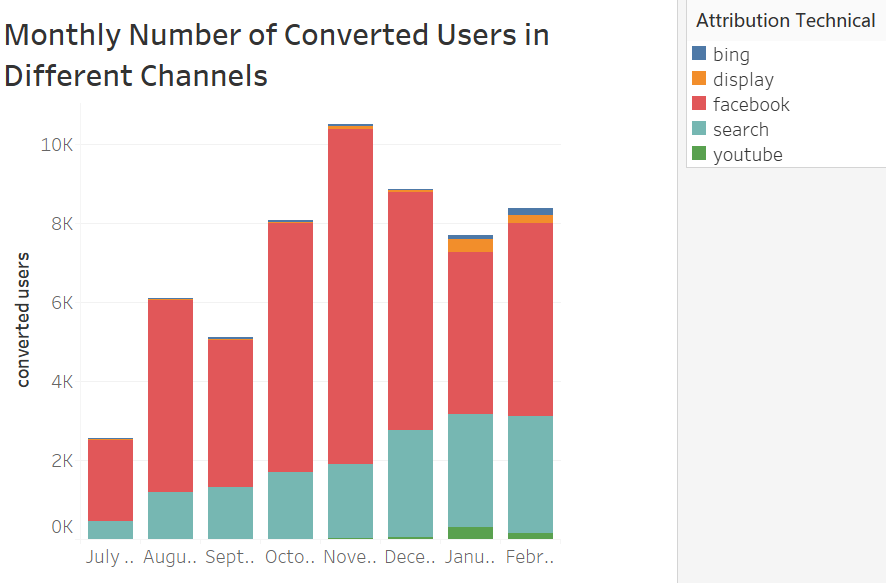